In [79]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np

In [80]:
data = json.loads(open("time_diffs4.json").read())
llm_times = pd.Series(data["llm_times"])
tts_times = pd.Series(data["tts_times"])
stt_times = pd.Series(data["stt_times"])
sent_audio_times = pd.Series(data["sent_audio_times"])
recieved_audio_times = pd.Series(data["recieved_audio_times"])
send_times = pd.Series(data["send_times"])
receive_times = pd.Series(data["receive_times"])

In [81]:
data = {
    "Send Times": send_times,
    "STT Times": stt_times,
    "LLM Times": llm_times,
    "TTS Times": tts_times,
    "Receive Times": receive_times,
}

# Cria um DataFrame com os dados
df = pd.DataFrame(data)

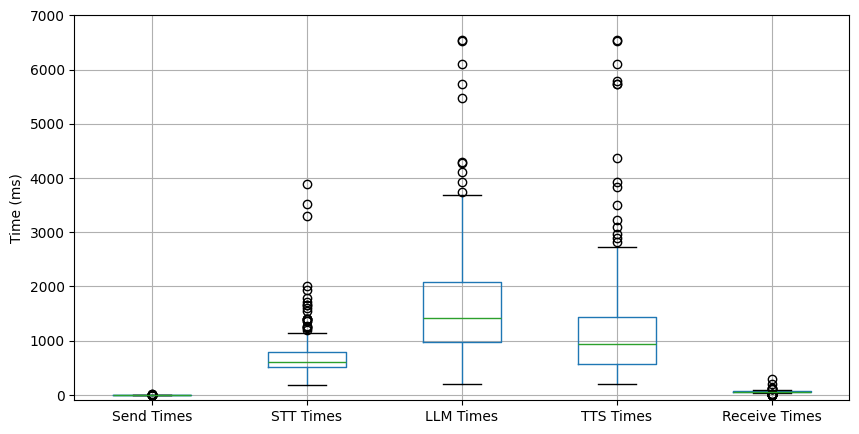

In [82]:
plt.figure(figsize=(10, 5))
df.boxplot()
# plt.title("Boxplot of All Times")
plt.ylabel("Time (ms)")
plt.ylim((-100,7000))
plt.show()

In [83]:
data = json.loads(open("time_diffs1.json").read())
llm_times = pd.DataFrame(data["llm_times"])
stt_times = pd.DataFrame(data["stt_times"])
tts_times = pd.DataFrame(data["tts_times"])
sent_audio_times = pd.DataFrame(data["sent_audio_size"])
recieved_audio_times = pd.DataFrame(data["recieved_audio_size"])
send_times = pd.DataFrame(data["send_times"])
receive_times = pd.DataFrame(data["receive_times"])
basal_time = data["basal_time"]

In [84]:
llm_times[[1,2]]= llm_times[[1,2]] - basal_time
tts_times[[1,2]]= tts_times[[1,2]] - basal_time
stt_times[[1,2]]= stt_times[[1,2]] - basal_time
send_times[[1,2]]= (send_times[[1,2]]) - basal_time
receive_times[[1,2]]= receive_times[[1,2]] - basal_time
send_times[[0]] = send_times[[0]]*1e-6

<Axes: >

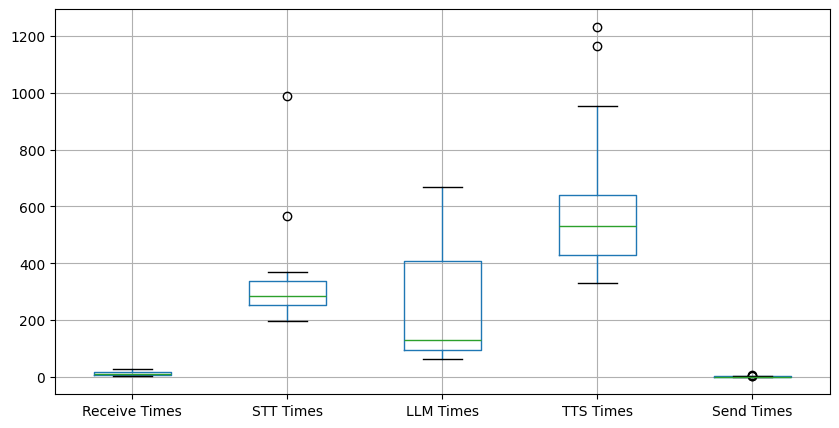

In [85]:
size_table = pd.DataFrame({
    "Receive Times": pd.Series(receive_times[0]),
    "STT Times": pd.Series(stt_times[0]),
    "LLM Times": pd.Series(llm_times[0]),
    "TTS Times": pd.Series(tts_times[0]),
    "Send Times": pd.Series(send_times[0]),
})
size_table.boxplot(column=["Receive Times", "STT Times", "LLM Times", "TTS Times", "Send Times"], figsize=(10, 5))

In [89]:
data_ini =pd.DataFrame({
    "Receive Times": pd.Series(receive_times[1]),
    "STT Times": pd.Series(stt_times[1]),
    "LLM Times": pd.Series(llm_times[1]),
    "TTS Times": pd.Series(tts_times[1]),
    "Send Times": pd.Series(send_times[1]),
})
size_table = pd.DataFrame({
    "Receive Times": pd.Series(receive_times[0])*10,
    "STT Times": pd.Series(stt_times[0]),
    "LLM Times": pd.Series(llm_times[0]),
    "TTS Times": pd.Series(tts_times[0]),
    "Send Times": pd.Series(send_times[0])*10,
})

In [90]:
size_table_1 = size_table.melt(var_name="Process", value_name="Time")
data_ini = data_ini.melt(var_name="Process", value_name="Time")
events_orders = data_ini.sort_values(by="Time", ascending=True).index
df = size_table_1.loc[events_orders].dropna()

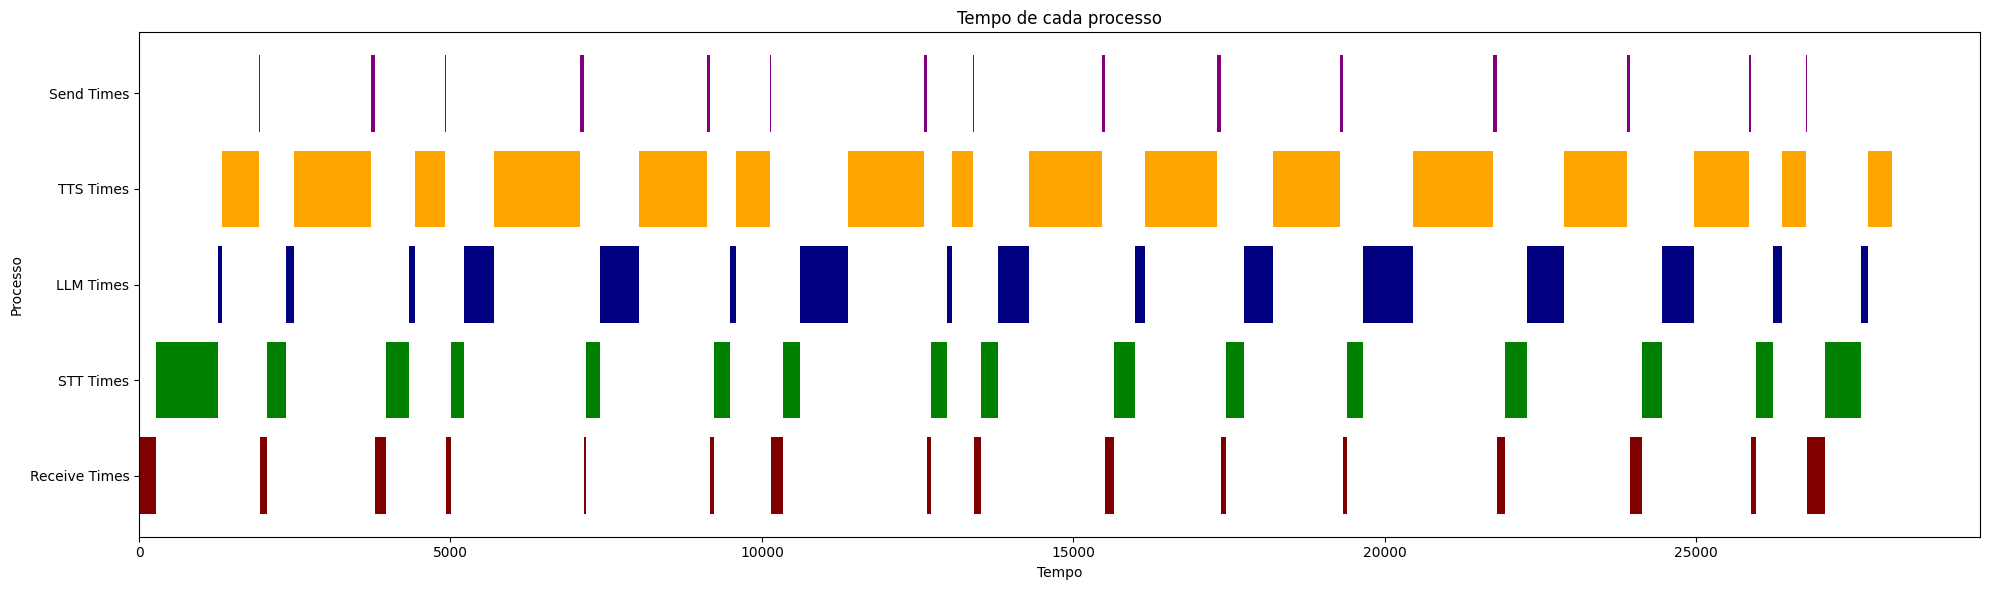

In [93]:
# Calcular a posição inicial de cada barra
df['start'] = df['Time'].cumsum().shift(fill_value=0)

# Criar o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(20, 6))

color_dict = {
    "Receive Times": "#800000",  # red
    "STT Times": "#008000",     # green
    "LLM Times": "#000080",     # blue
    "TTS Times": "#FFA500",     # orange
    "Send Times": "#800080"     # purple
}

for i, row in df.iterrows():
    ax.barh(row['Process'], row['Time'], left=row['start'], color=color_dict[row["Process"]])

# Configurar rótulos e título
plt.xlabel('Tempo')
plt.ylabel('Processo')
plt.title('Tempo de cada processo em sequencia')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

<Axes: title={'center': 'Tempo de cada processo acumulado'}, xlabel='Processo', ylabel='Tempo (ms)'>

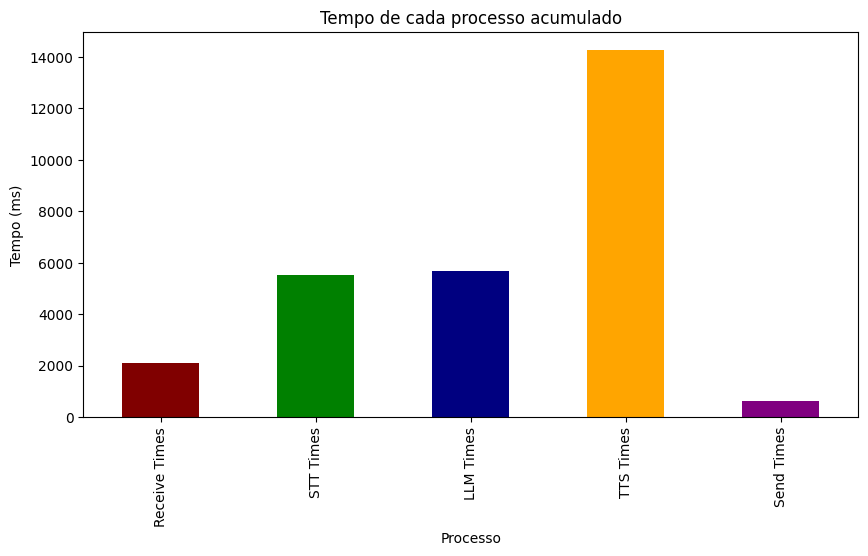

In [103]:
size_table.sum(axis=0).plot(title="Tempo de cada processo acumulado", kind='bar', figsize=(10, 5), color=color_dict.values(), xlabel="Processo", ylabel="Tempo (ms)")